In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import gensim
import os
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import numpy as np
from operator import itemgetter
from more_itertools import take
from collections import Counter
from topic_agg import top_words_by_domain, gen_wordcloud
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)

In [7]:
cols_df = ['full_name', 'description', 'filtered']
prefix_df = 'en_cleaned_all_more_'

docs_jn_2019 = f'.\\yearly_dataset\\5_stars\\{prefix_df}jupyter_notebook_2019.csv'

df_docs_jn_2019 = pd.read_csv(docs_jn_2019, usecols=cols_df)

docs_jn_2020 = f'.\\yearly_dataset\\5_stars\\{prefix_df}jupyter_notebook_2020.csv'

df_docs_jn_2020 = pd.read_csv(docs_jn_2020, usecols=cols_df)

docs_py_2019 = f'.\\yearly_dataset\\5_stars\\{prefix_df}python_2019.csv'

df_docs_py_2019 = pd.read_csv(docs_py_2019, usecols=cols_df)

docs_py_2020 = f'.\\yearly_dataset\\5_stars\\{prefix_df}python_2020.csv'

df_docs_py_2020 = pd.read_csv(docs_py_2020, usecols=cols_df)

In [8]:
main_folder = './Experiments_more_5stars/'

modelfile='30_100.model'

model_jn_2019_path = f'{main_folder}jupyter_notebook/2019/models/'
model_jn_2019 = gensim.models.ldamodel.LdaModel.load(model_jn_2019_path+modelfile)

modelfile='29_100.model'

model_jn_2020_path = f'{main_folder}jupyter_notebook/2020/models/'
model_jn_2020 = gensim.models.ldamodel.LdaModel.load(model_jn_2020_path+modelfile)

modelfile='30_100.model'

model_py_2019_path = f'{main_folder}python/2019/models/'
model_py_2019 = gensim.models.ldamodel.LdaModel.load(model_py_2019_path+modelfile)

modelfile='30_100.model'

model_py_2020_path = f'{main_folder}python/2020/models/'
model_py_2020 = gensim.models.ldamodel.LdaModel.load(model_py_2020_path+modelfile)


## Jupyter 2019

In [9]:
curr_model = model_jn_2019

curr_df = df_docs_jn_2019
curr_dict = gensim.corpora.Dictionary.load(model_jn_2019_path+'MultiCore.dict')

for i, row in curr_df.iterrows():
    docProbs = curr_model[[curr_dict.doc2bow(row['filtered'].split())]]
    for p in docProbs[0]:
        curr_df.at[i, f'topic_{p[0]}'] = float(round(p[1], 3))

In [10]:
num_topic = 4
curr_topic = f'topic_{num_topic}'
curr_df.sort_values(curr_topic,ascending = False).head(50)[['full_name', 'description', 'filtered', curr_topic]]

,full_name,description,filtered,topic_4
4400,ISorokos/SafeML,Exploring techniques for estimating safety of machine learning classifiers,machine_learning classifier explore technique estimate safety,0.210
2054,Lexie88rus/Activation-functions-examples-pytorch,Repository containing article with examples of custom activation functions for Pytorch,pytorch article custom function activation,0.193
2955,samanfrm/ADRtarget,Machine learning guided association of adverse drug reactions with in vitro off-target pharmacology,guide target drug association adverse reaction pharmacology vitro,0.184
3057,medical-stats-book/python-medical-stats-book-1,"The final version of articles, data and codes for publishing.",data article publish,0.171
4532,ned2/melbviz,Dashboards for exploring Melbourne City Council Pedestrian traffic,city explore traffic melbourne pedestrian dashboard council,0.170
892,tosmaster/bert-race,We are going to explore the multiple choice reading comprehension with bert based on RACE dataset,bert explore comprehension multiple choice race reading,0.166
255,parulnith/Image-Processing-in-Python,This repository contains the links to the article that I wrote on Medium pertaining to Image processing.,article medium image_processing link pertain,0.154
1779,casperbh96/Tour-of-TensorFlow-2.0,Exploring operations and custom training and testing loops in TensorFlow 2.0,training custom explore tensorflow_2 operation loop,0.151
240,Apress/practical-ml-image-processing,Source Code for 'Practical Machine Learning and Image Processing' by Himanshu Singh,practical singh himanshu image_processing,0.147
1744,deepaktalwardt/badminton-pose-analysis,Badminton Pose Analysis for coaching and pose correction,pose correction badminton coaching,0.147


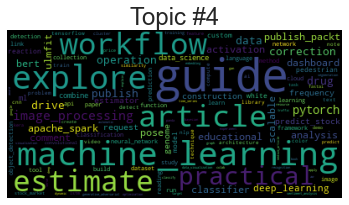

In [11]:
plt.figure()
plt.imshow(WordCloud().fit_words(dict(curr_model.show_topic(num_topic, 200))))
plt.axis("off")
plt.title("Topic #" + str(num_topic))
plt.show()

In [12]:
num_topic = 0
rows_topics = [f'topic_{n}' for n in range(curr_model.num_topics)]
test = curr_df

for i, row in test.iterrows():
    dict_topic = {}
    for topic in rows_topics:
        dict_topic[topic.replace('topic_', '')] = row[topic]
    dict_topic = {k: v for k, v in sorted(dict_topic.items(), key=itemgetter(1), reverse=True)}
    uniques = len(set([*dict_topic.values()]))
    top_keys = []
    top_key = take(2, dict_topic.keys())
    test.at[i, 'top_topic_1'] = int(top_key[0])
    test.at[i, 'top_topic_2'] = int(top_key[1])
    test.at[i, 'uniques'] = uniques


In [13]:
test.shape

(4891, 36)

In [14]:
test_2 = test.drop(test.loc[test['uniques'] == 1].index)

In [15]:
test_2.shape

(4773, 36)

In [16]:
test_2 = test_2.drop(test_2.loc[(test_2['uniques'] == 2) & (test_2['top_topic_1'].isin([0, 4, 6]))].index)

In [17]:
test_2.shape

(4704, 36)

In [18]:
topic_sub = [0, 4, 6]
for i, row in test_2.iterrows():
    if row['top_topic_1'] in topic_sub:
        test_2.at[i, 'top_topic'] = row['top_topic_2']
    else:
        test_2.at[i, 'top_topic'] = row['top_topic_1']

In [19]:
test_2 = test_2.drop(test_2.loc[(test_2['top_topic'].isin(topic_sub))].index)

In [20]:
df = df_docs_jn_2019
bad_topics = [0, 4, 6]

for i, row in df.iterrows():
    docProbs = curr_model[[curr_dict.doc2bow(row['filtered'].split())]]
    topics = {}
    for p in docProbs[0]:
        topics[int(p[0])] = float(round(p[1], 3))

    topics = {k: v for k, v in sorted(topics.items(), key=itemgetter(1), reverse=True)}
    uniques = len(set([*topics.values()]))
    top_key = take(2, topics.keys())

    if uniques > 1:
        if top_key[0] in bad_topics:
            if uniques > 2 and (top_key[1] not in bad_topics):
                df.at[i, 'top_topic'] = top_key[1]
        else:
            df.at[i, 'top_topic'] = top_key[0]

In [21]:
df = df[df['top_topic'].notna()]

df.shape

(4662, 37)

In [22]:
language = 'jupyter_notebook'
year = '2019'

file_topics = f'.\\yearly_dataset\\5_stars\\topic_{prefix_df}{language}_{year}.csv'
cols_df = ['full_name', 'description', 'filtered', 'top_topic']

df_topics = pd.read_csv(file_topics, usecols=cols_df)

In [23]:
domains = {'others': [12, 16, 23, 25, 29], 'prediction': [1, 2, 9, 10, 22], 'classification': [3, 5, 7, 8, 11, 13, 14, 15, 17, 18, 19, 20, 21, 24, 26, 27, 28]}

for i, row in df_topics.iterrows():
    for key, item in domains.items():
        if row['top_topic'] in item:
            df_topics.at[i, 'domain'] = key

In [24]:
df_topics.groupby(['domain']).size()

domain
classification    2912
others             816
prediction         934
dtype: int64

In [25]:
dict_words_domain = {}

for domain, topics in domains.items():
        list_dict = []
        for topic in topics:
            words = dict(curr_model.show_topic(topic, 20))
            list_dict.append(words)
        total = sum((Counter(dict(x)) for x in list_dict), Counter())
        dict_words_domain[domain] = {k: v for k, v in sorted(total.items(), key=itemgetter(1), reverse=True)}

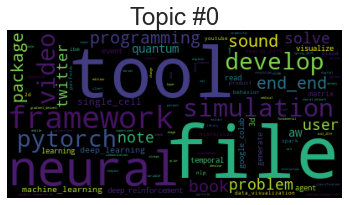

In [26]:

plt.figure()
plt.imshow(WordCloud().fit_words(dict_words_domain['others']))
plt.axis("off")
plt.title("Topic #" + str(num_topic))
plt.show()

In [27]:
len(dict_words_domain['others'])

96

In [28]:
rows_topics = [f'topic_{n}' for n in range(curr_model.num_topics)]

test = curr_df
# test = curr_df.sample(10, random_state=0)

for i, row in test.iterrows():
    dict_topic = {}
    for topic in rows_topics:
        dict_topic[topic.replace('topic_', '')] = row[topic]
    dict_topic = {k: v for k, v in sorted(dict_topic.items(), key=itemgetter(1), reverse=True)}
    uniques = len(set([*dict_topic.values()]))
    top_keys = []
#     if uniques > 2:
#         top_keys = take(2, dict_topic.keys())
#         test.at[i, 'top_topics'] = ', '.join(top_keys)
#     else:
    top_key = take(1, dict_topic.keys())[0]
    test.at[i, 'top_topics'] = top_key
    domain = ''
#     for k in top_keys:
    for k_domain, topics_dom in domains.items():
        if int(top_key) in topics_dom:
#             if k_domain not in domain:
            domain = k_domain
            break
#     test.at[i, 'domain'] = ', '.join(domain)
    test.at[i, 'domain'] = domain


In [29]:
test.groupby(['top_topics']).size()

top_topics
0     363
1     172
10    164
11    160
12    175
13    145
14    113
15    169
16    154
17    177
18    177
19    135
2     154
20    158
21    149
22    193
23    117
24    136
25    143
26    147
27    144
28    140
29    149
3     182
4     152
5     191
6     188
7     138
8     159
9     147
dtype: int64

In [30]:
test.groupby(['domain']).size()

domain
                   703
classification    2620
others             738
prediction         830
dtype: int64

## Python 2019

In [31]:
curr_model = model_py_2019

curr_df = df_docs_py_2019
curr_dict = gensim.corpora.Dictionary.load(model_py_2019_path+'MultiCore.dict')
for i, row in curr_df.iterrows():
    docProbs = curr_model[[curr_dict.doc2bow(row['filtered'].split())]]
    for p in docProbs[0]:
        curr_df.at[i, f'topic_{p[0]}'] = float(round(p[1], 3))

In [32]:
num_topic = 0
curr_topic = f'topic_{num_topic}'
curr_df.sort_values(curr_topic,ascending = False).head(50)[['full_name', 'description', 'filtered', curr_topic]]

,full_name,description,filtered,topic_0
1621,sharibj/ImageTranslator,A translator that translates the text inside an image and reconstructs the image by replacing actual text with the translated text.,image text reconstruct translator translate replace actual,0.316
2699,l-n-monitoring/CM-RT-GRAPH,RealTime Cable Modem Graph for DOCSIS,graph realtime modem cable docsis,0.311
737,kapil-varshney/scrape-marathon-images,Using Selenium and Beautiful Soup to scrape marathon images,beautiful selenium scrape marathon soup,0.311
13235,viritaromero/Plant-Diseases-Detector-Web-App,Computer Vision Model created in FastAi to detect diseases in plants and Web App made in Render,detect create fastai render plant disease computer_vision web_app,0.293
1802,LCorleone/Face-Antispoofing,This is a toy face antispoofing implementation based on single RGB images.,image face toy antispoofe single_rgb,0.284
2488,lint/avg-color-bar,Graph | Creates a barcode image for a given video.,image create graph video barcode,0.284
1181,rakhimovv/tcav,Quantitative Testing with Concept Activation Vectors in PyTorch,activation vector concept quantitative,0.284
3194,hpark3910/nonnegative-matrix-factorization,A python program that applies a choice of nonnegative matrix factorization (NMF) algorithms to a dataset for clustering.,clustering matrix_factorization apply choice nmf nonnegative,0.282
17142,thmoa/octopus,This repository contains code corresponding to the paper Learning to Reconstruct People in Clothing from a Single RGB Camera.,camera people learning reconstruct single_rgb clothe,0.261
4813,ZackAkil/edge-TPU-safe-bike,An application of realtime object-detection running on an Edge TPU for making cycling in busy cities a little less terrifying.,object_detection realtime city edge_tpu running cycling busy terrifying,0.261


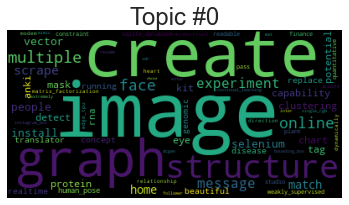

In [33]:
plt.figure()
plt.imshow(WordCloud().fit_words(dict(curr_model.show_topic(num_topic, 200))))
plt.axis("off")
plt.title("Topic #" + str(num_topic))
plt.show()

## Jupyter 2020

In [34]:
curr_model = model_jn_2020

curr_df = df_docs_jn_2020
curr_dict = gensim.corpora.Dictionary.load(model_jn_2020_path+'MultiCore.dict')

for i, row in curr_df.iterrows():
    docProbs = curr_model[[curr_dict.doc2bow(row['filtered'].split())]]
    for p in docProbs[0]:
        curr_df.at[i, f'topic_{p[0]}'] = float(round(p[1], 3))

In [35]:
num_topic = 28
curr_topic = f'topic_{num_topic}'
curr_df.sort_values(curr_topic,ascending = False).head(50)[['full_name', 'description', 'filtered', curr_topic]]

,full_name,description,filtered,topic_28
1839,rakshit087/Face-Mask-Detection-PyTorch,"A real-time face mask detector based on computer vision and deep learning, created using Pytorch and OpenCV",pytorch deep_learning create computer_vision opencv real_time detector face_mask,0.281
966,VijayalaxmiH18/Real-time-Face-Mask-Detector-,A real-time face mask detector using Tensorflow and OpenCV,tensorflow opencv real_time detector face_mask,0.256
2167,Bevin7/MaskDETECTION,Use Deep Learning and Opencv for face mask Detection.,deep_learning detection opencv face_mask,0.216
786,HarshGoel31/ML-with-Hands-on-Python-and-R,It can termed as a repositories that contains all the essential models related to the field of Machine Learning .,model term machine_learning essential field,0.210
1046,nmdoshi/HandsOnLabDOWS,Decision Optimization and Machine learning on IBM Watson Studio and Watson machine learning,machine_learning studio optimization decision ibm watson,0.203
3915,chandrikadeb7/Face-Mask-Detection,Face Mask Detection system based on computer vision and deep learning using OpenCV and Tensorflow/Keras,deep_learning detection computer_vision tensorflow_kera opencv face_mask,0.197
2290,fmaussion/climate_system,"Notes and practicals for my ""Physics of the Climate System"" lecture",note lecture practical physics climate,0.197
3861,learningmatter-mit/NeuralForceField,Neural Network Force Field based on PyTorch,pytorch neural_network force field,0.181
2389,FarhanSadaf/face-mask-detection,Real-time face mask detection.,detection real_time face_mask,0.176
3198,PooyaAlamirpour/TrafficSignClassifier,This project is an aspect of a big project that is called the Self-Driving Car. One of the essential techniques in Self-Driving Car engineering is detecting the Traffic Sign. In this project I have used Deep Learning for recognizing the Traffic Signs.,call recognize big traffic sign essential drive_car aspect,0.173


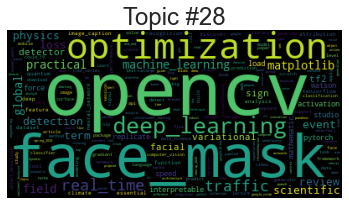

In [36]:
plt.figure()
plt.imshow(WordCloud().fit_words(dict(curr_model.show_topic(num_topic, 200))))
plt.axis("off")
plt.title("Topic #" + str(num_topic))
plt.show()

## Python 2020

In [37]:
curr_model = model_py_2020

curr_df = df_docs_py_2020
curr_dict = gensim.corpora.Dictionary.load(model_py_2020_path+'MultiCore.dict')

for i, row in curr_df.iterrows():
    docProbs = curr_model[[curr_dict.doc2bow(row['filtered'].split())]]
    for p in docProbs[0]:
        curr_df.at[i, f'topic_{p[0]}'] = float(round(p[1], 3))

In [38]:
num_topic = 29
curr_topic = f'topic_{num_topic}'
curr_df.sort_values(curr_topic,ascending = False).head(50)[['full_name', 'description', 'filtered', curr_topic]]

,full_name,description,filtered,topic_29
23235,JMorado/ParaMol,A Package for Parametrization of Molecular Mechanics Force Fields,package field force molecular mechanic parametrization,0.458
15979,KelvinYang0320/deepbots-panda,Panda with Deep Reinforcement Learning Simulation Environment Webots,learning environment simulation deep_reinforcement panda webot,0.413
2506,th3gundy/CVE-2019-7192_QNAP_Exploit,QNAP pre-auth root RCE Exploit (CVE-2019-7192 ~ CVE-2019-7195),rce cve_2019 exploit pre root qnap,0.413
20841,cycraft-corp/cve-2019-7192-check,Checker for QNAP pre-auth root RCE (CVE-2019-7192 ~ CVE-2019-7195),rce cve_2019 pre checker root qnap,0.413
5407,Mizan-Ali/Zoom_Automation,A python script that automatically joins a zoom meeting based on your timetable.,automatically zoom meeting timetable,0.391
2922,maximilianigl/rl-iter,Repository for Iterated Relearning: The Impact of Non-stationarity on Generalisation in Deep Reinforcement Learning,learning stationarity deep_reinforcement iterate impact generalisation relearn,0.391
7467,ERC-BPGC/gennav,Python Package for Robot Navigation,robot package navigation,0.391
7651,Kn0wn-Un/Auto-Zoom,Python script to automatically join Zoom meetings,automatically zoom meeting,0.391
5959,DENG-MIT/reactorch,A Differentiable Reacting Flow Simulation Package in PyTorch,pytorch flow package react simulation differentiable,0.376
2558,HexNio/ssl_pinning_remover,An Android SSL Pinning Remover tool for Security research and Bug Bounty,android security research pin bug_bounty remover ssl,0.348


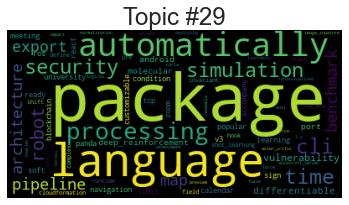

In [39]:
plt.figure()
plt.imshow(WordCloud().fit_words(dict(curr_model.show_topic(num_topic, 200))))
plt.axis("off")
plt.title("Topic #" + str(num_topic))
plt.show()

In [40]:
cols_topic = ['domain', 'top_topic']
prefix_df = 'en_cleaned_all_more'
language = 'jupyter_notebook'
year = '2019'
main_folder = './Experiments_more_5stars/'
ds_folder = '.\\yearly_dataset\\5_stars\\'

foldermodels = f'{main_folder}{language}/{year}/models/'
file_topics = f'{ds_folder}topic_{prefix_df}_{language}_{year}.csv'

In [41]:
df_jn_2019 = pd.read_csv(file_topics, usecols=cols_topic)

year = 2020
file_topics = f'{ds_folder}topic_{prefix_df}_{language}_{year}.csv'
df_jn_2020 = pd.read_csv(file_topics, usecols=cols_topic)

df_jn_2019['year'] = 2019
df_jn_2020['year'] = 2020

merged_jn = pd.concat([df_jn_2019, df_jn_2020])

<AxesSubplot:xlabel='year'>

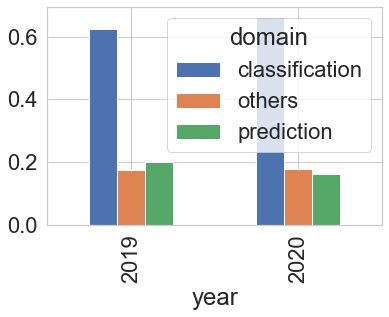

In [42]:
merged_jn.groupby("year")["domain"].value_counts(normalize=True).unstack().plot(kind="bar")

In [43]:
language = 'python'
year = '2019'

foldermodels = f'{main_folder}{language}/{year}/models/'
file_topics = f'{ds_folder}topic_{prefix_df}_{language}_{year}.csv'

df_py_2019 = pd.read_csv(file_topics, usecols=cols_topic)

year = 2020
file_topics = f'{ds_folder}topic_{prefix_df}_{language}_{year}.csv'
df_py_2020 = pd.read_csv(file_topics, usecols=cols_topic)

df_py_2019['year'] = 2019
df_py_2020['year'] = 2020

merged_py = pd.concat([df_py_2019, df_py_2020])

<AxesSubplot:xlabel='year'>

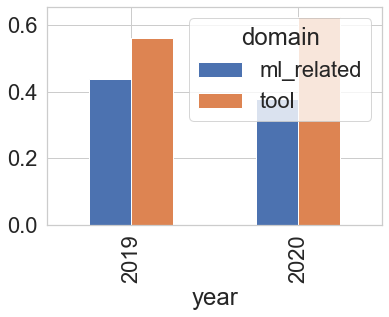

In [44]:
merged_py.groupby("year")["domain"].value_counts(normalize=True).unstack().plot(kind="bar")

In [46]:
language = 'jupyter_notebook'
year = '2019'
foldermodels = f'{main_folder}{language}/{year}/models/'

domains = {'others': [12, 16, 23, 25, 29], 'prediction': [1, 2, 9, 10, 22], 'classification': [3, 5, 7, 8, 11, 13, 14, 15, 17, 18, 19, 20, 21, 24, 26, 27, 28]}

words_jn_2019 = top_words_by_domain(domains, foldermodels)

domains = {'others': [4, 5, 18, 20, 22], 'prediction': [1, 2, 24, 27], 'classification': [0, 3, 6, 8, 9, 10, 12, 13, 14, 15, 17, 19, 21, 23, 25, 26, 28]}
year = '2020'
foldermodels = f'{main_folder}{language}/{year}/models/'

words_jn_2020 = top_words_by_domain(domains, foldermodels)

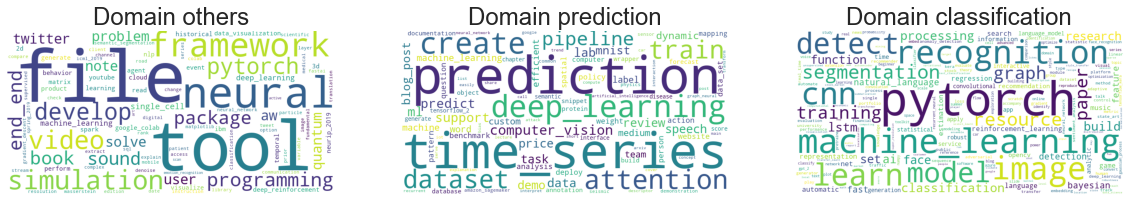

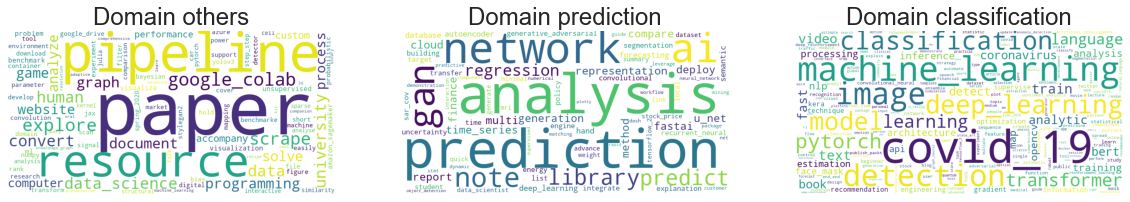

In [47]:
plt.rcParams['figure.figsize'] = [20, 15]
gen_wordcloud(words_jn_2019, language, '2019')
gen_wordcloud(words_jn_2020, language, '2020')

In [48]:
language = 'python'
year = '2019'
foldermodels = f'{main_folder}{language}/{year}/models/'

domains = {'ml_related': [2,4, 6, 10, 11, 12, 15, 19, 20, 23], 'tool': [0, 3, 5, 7, 8, 9, 13, 14, 16, 17, 21, 22, 25, 26, 27]}

words_py_2019 = top_words_by_domain(domains, foldermodels)

domains = {'ml_related': [2, 6, 10, 11, 16, 21, 22, 27, 28], 'tool': [3, 4, 5, 7, 8, 12, 13, 14, 15, 23, 24, 25, 26]}

year = '2020'
foldermodels = f'{main_folder}{language}/{year}/models/'

words_py_2020 = top_words_by_domain(domains, foldermodels)

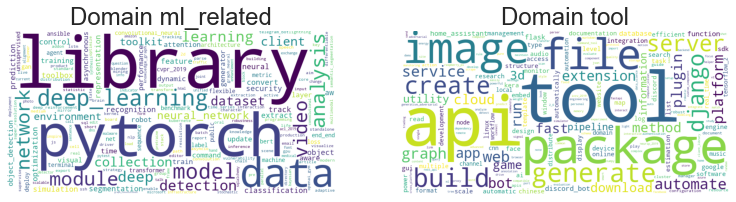

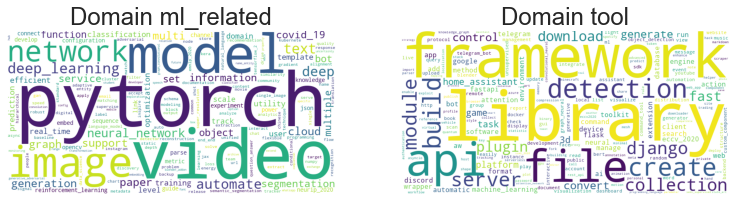

In [50]:
plt.rcParams['figure.figsize'] = [20, 15]
gen_wordcloud(words_py_2019, language, '2019')
gen_wordcloud(words_py_2020, language, '2020')